https://bit.ly/FEML-3-GD

## Градиентный спуск

In [83]:
import numpy as np
from sklearn.datasets import make_blobs # binary large objects
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

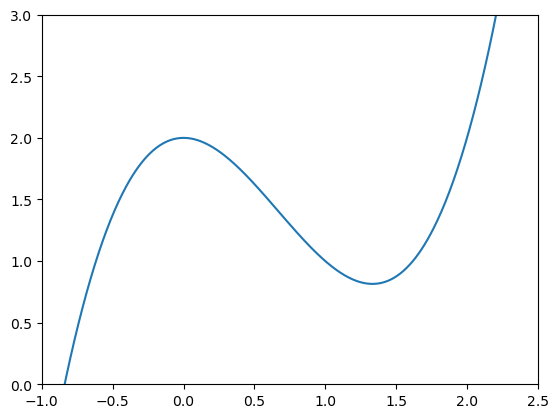

In [84]:
f = lambda x: x**3 - 2 * x**2 + 2
x = np.linspace(-1, 2.5, 500)
plt.plot(x,f(x))
plt.xlim([-1,2.5])
plt.ylim([0,3])
plt.show()

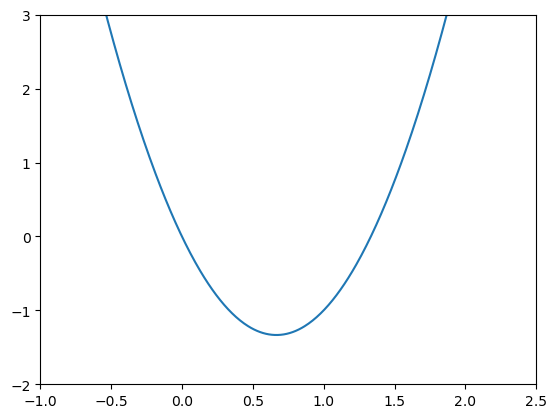

In [85]:
f_prime = lambda x: 3 * x**2 - 4 * x
x = np.linspace(-1, 2.5, 500)
plt.plot(x, f_prime(x))
plt.xlim([-1,2.5])
plt.ylim([-2,3])
plt.show()

## Метод градиентного спуска

In [86]:
lr = 0.1
points = [2]
n_epochs = 15

In [87]:
for _ in range(n_epochs):
    cur_point = points[-1]
    grad = f_prime(cur_point)
    new_point = cur_point - lr * grad
    points.append(new_point)

In [88]:
y_points = [f(p) for p in points]

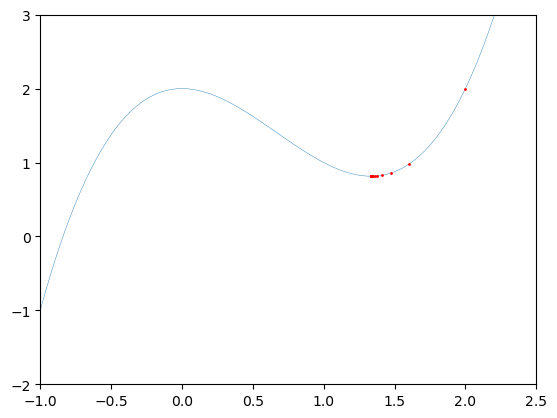

In [89]:
plt.plot(x,f(x), linewidth = .3)
plt.plot(points, y_points, 'ro', markersize  =1)
plt.xlim([-1,2.5])
plt.ylim([-2,3])
plt.show()

## Практический пример

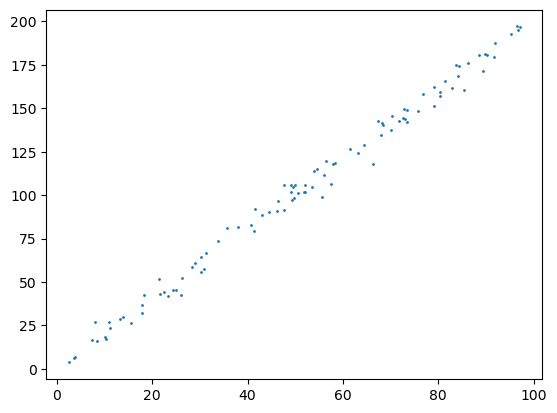

In [90]:
N = 100
X = np.random.uniform(low=0, high=100, size=N)
Y = 2*X + 1 + np.random.normal(scale=5, size=N)
plt.rcParams['lines.markersize'] = 1
plt.scatter(X, Y)
plt.show()

## Применим метод градиентного спуска

In [91]:
EPOCHS = 20
LEARNING_RATE = 0.01

In [92]:
def cost_function(X, y, theta0, theta1):
    sum = 0
    for i in range(len(X)):
        sum += (theta0 + theta1 * X[i] - y[i]) ** 2
    return sum / len(X)

$$Loss = (θ_0 + θ_1 * x - y)^2 $$

$$\frac{dLoss}{dθ_0} = 2 \cdot (θ_0 + θ_1 * x - y) \cdot 1 $$


$$\frac{dLoss}{dθ_1} = 2 \cdot (θ_0 + θ_1 * x - y) \cdot x $$

In [93]:
def der_theta0(X, y, theta0, theta1):
    sum = 0
    for i in range(len(X)):
        sum += 2 * (theta0 + theta1 * X[i] - y[i])
    return sum / len(X)    

In [94]:
def der_theta1(X, y, theta0, theta1):
    sum = 0
    for i in range(len(X)):
        sum += 2 * (theta0 + theta1 * X[i] - y[i]) * X[i]
    return sum / len(X)

In [95]:
theta0 = 1
theta1 = 1

for _ in range(EPOCHS):
    dt0 = der_theta0(X, Y, theta0, theta1)
    dt1 = der_theta1(X, Y, theta0, theta1)
    
    theta0 = theta0 - LEARNING_RATE * dt0
    theta1 -= LEARNING_RATE * dt1
    
    print("t0:", theta0, "t1:", theta1, "cost:", cost_function(X, Y, theta0, theta1))

t0: 2.023467100405123 t1: 67.91718870214918 cost: 14633189.860050635
t0: -65.8921460738789 t1: -4370.497843709916 cost: 64375240081.13581
t0: 4438.71387755507 t1: 290016.20005049015 cost: 283204013522895.5
t0: -294338.2644117195 t1: -19235766.566528413 cost: 1.245890705856235e+18
t0: 19522638.54286395 t1: 1275850578.6538293 cost: 5.481008660965123e+21
t0: -1294877730.1423287 t1: -84623324969.19824 cost: 2.4112432816431347e+25
t0: 85885338806.38512 t1: 5612810199083.033 cost: 1.0607708403521074e+29
t0: -5696515774608.808 t1: -372280790687822.25 cost: 4.666616530599636e+32
t0: 377832729331311.7 t1: 2.4692263269091616e+16 cost: 2.0529702566519543e+36
t0: -2.5060506632885716e+16 t1: -1.6377634318000607e+18 cost: 9.031568904497124e+39
t0: 1.6621879047069228e+18 t1: 1.0862791431108002e+20 cost: 3.973230328709438e+43
t0: -1.1024791601493035e+20 t1: -7.204962290924991e+21 cost: 1.7479309975829166e+47
t0: 7.312412123332254e+21 t1: 4.778834422337442e+23 cost: 7.689619074521678e+50
t0: -4.8501026

In [96]:
cost_function(X,Y,10,10)

223236.60401985294

$$Loss = \frac{1}{n}||Xw - Y||^{2}$$


где используется $L_{2}$ норма:

$$||X w - Y|| = \sqrt{\sum_{i=1}^n{(X_iw - y_i)^2}} $$

$$MSE = \frac{1}{n}\sqrt{\sum_{i=1}^n{(X_iw - y_i)^2}} ^{2} = \frac{1}{n}\sum_{i=1}^n{(X_iw - y_i)^2}$$

Градиент:

$$\frac{∂ MSE}{∂ w_0} = \frac{2}{n}\sum{({Xw - y})}$$

$$\frac{∂ MSE}{∂ w} = \frac{2}{n}\sum{({Xw - y}) \cdot X}$$


In [97]:
EPOCHS = 20
LEARNING_RATE = 0.0001

costs = []
params = []
preds = []
np.random.seed(9)
params = np.random.normal(size=(2,))
print(params)

list_params_gd = [params.copy()]
for _ in range(EPOCHS):
    predictions = params[0] + params[1] * X
    preds.append(predictions)

    # cost = np.sum((predictions - Y) ** 2) / len(predictions)
    cost = np.mean((predictions - Y) ** 2)    
    costs.append(cost)
    
    params[0] -= LEARNING_RATE * np.mean(predictions - Y) * 2
    params[1] -= LEARNING_RATE * np.mean((predictions - Y) * X) * 2

    list_params_gd.append(params.copy())

[ 0.00110855 -0.28954407]


In [98]:
costs[-1]

23.3427148162086

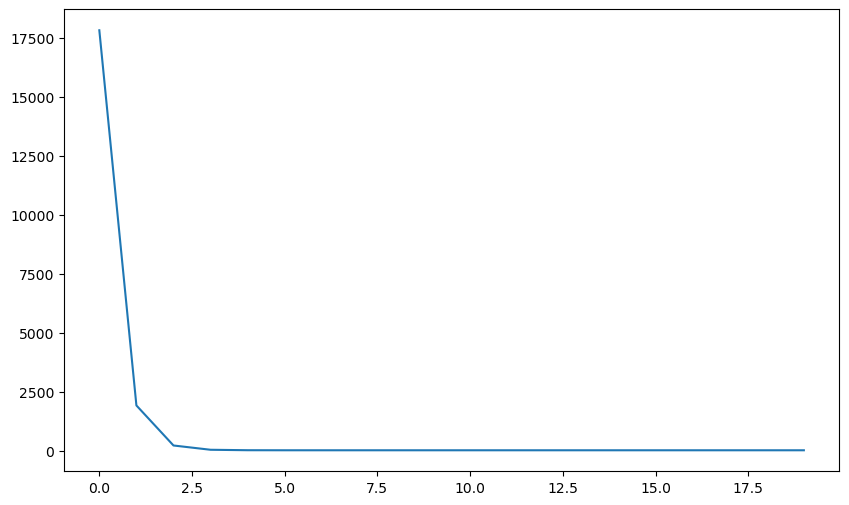

In [99]:
plt.figure(figsize=(10, 6))
plt.plot(costs)
plt.show()

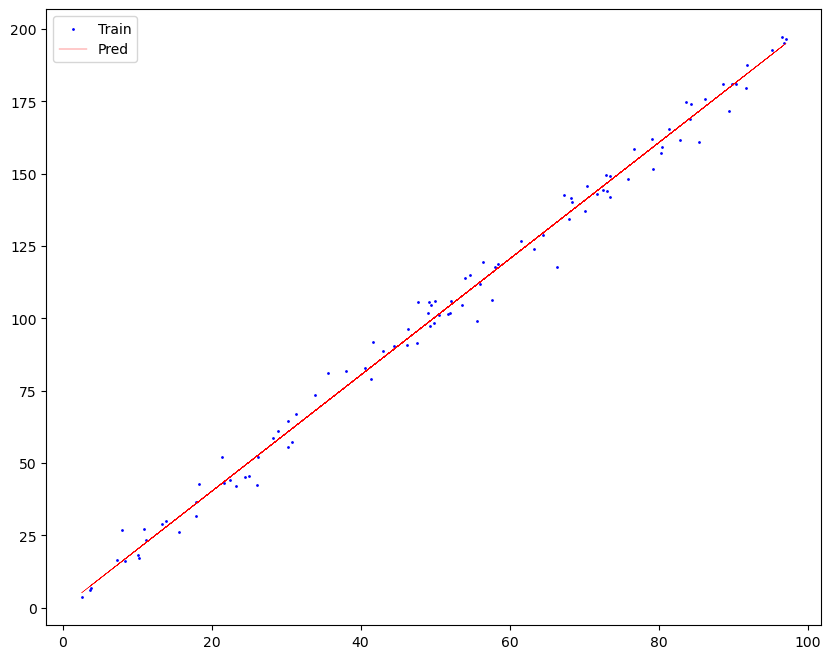

In [100]:
plt.figure(figsize=(10, 8))
plt.scatter(X, Y, color='blue', label='Train')
plt.plot(X, preds[10], color='red', label='Pred', linewidth=.3)
plt.legend()
plt.show()

In [101]:
params

array([0.037013  , 2.00888122])

## Метод стохастического градиентного спуска

In [102]:
EPOCHS = 100
LEARNING_RATE = 0.0001

costs = []
params = []
preds = []
np.random.seed(9)
params = np.random.normal(size=(2,))
print(params)
list_params_sgd = [params.copy()]

for _ in range(EPOCHS):
    predictions = params[0] + params[1] * X
    preds.append(predictions)
    
    cost = np.sum((predictions - Y) ** 2) / len(predictions)
    costs.append(cost)
    
    i = np.random.choice(len(X))
    current_prediction = params[0] + params[1] * X[i]

    params[0] -= LEARNING_RATE * np.sum(current_prediction - Y[i]) * 2
    params[1] -= LEARNING_RATE * np.sum((current_prediction - Y[i]) * X[i]) * 2

    list_params_sgd.append(params.copy())

[ 0.00110855 -0.28954407]


In [103]:
costs[-1]

23.346973408503278

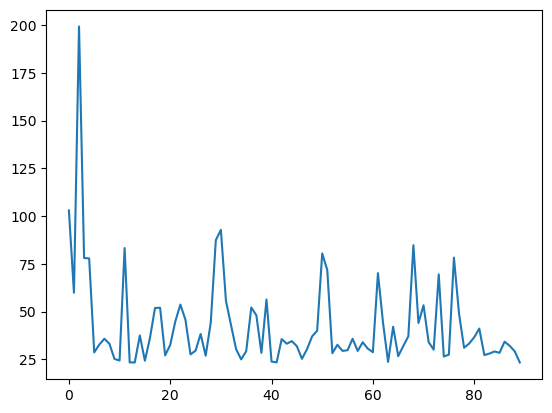

In [104]:
plt.plot(costs[10:])
plt.show()

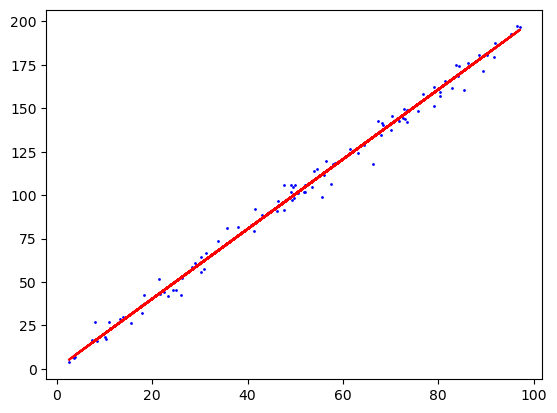

In [105]:
plt.scatter(X, Y, color='blue')
plt.plot(X, preds[-1], color='red')
plt.show()

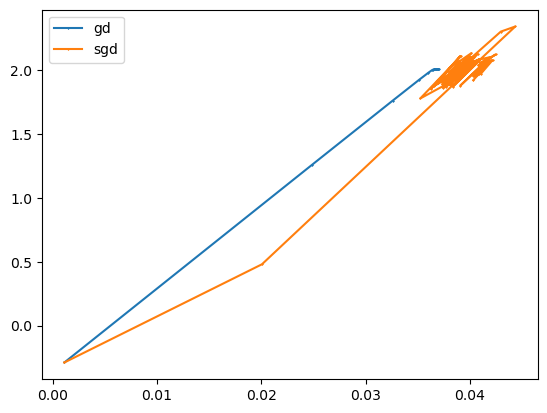

In [106]:
list_params_sgd = np.array(list_params_sgd)
list_params_gd = np.array(list_params_gd)

plt.plot(list_params_gd[:, 0], list_params_gd[:, 1], marker='*', label='gd')
plt.plot(list_params_sgd[:, 0], list_params_sgd[:, 1], marker='*', label='sgd')
plt.legend()
plt.show()

## **Дополнительные материалы**
1. Методы оптимизации нейронных сетей https://habr.com/ru/post/318970/
2. Реализация линейной регрессии https://www.youtube.com/watch?v=KJA9A1q9l7E
3. Реализация логистической регрессии https://youtu.be/ruVK07YF-RU
4. Метод сопряжённых градиентов (Newton conjugate gradient method) http://www.machinelearning.ru/wiki/index.php?title=%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D1%81%D0%BE%D0%BF%D1%80%D1%8F%D0%B6%D1%91%D0%BD%D0%BD%D1%8B%D1%85_%D0%B3%D1%80%D0%B0%D0%B4%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2
